<a href="https://colab.research.google.com/github/AHamamd150/Zewail-city/blob/main/CNN_Autoencoders_for_image_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

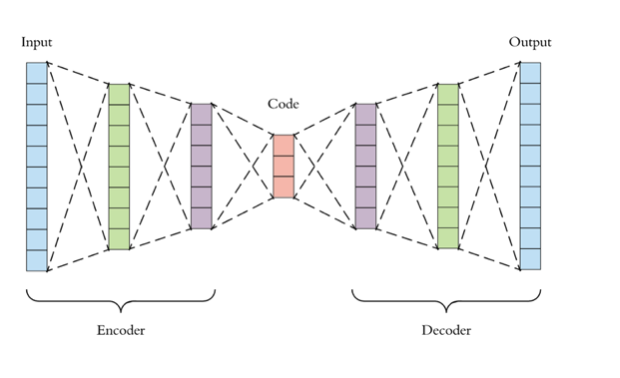

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
import gzip
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam,RMSprop
from keras import regularizers
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
plt.style.use('fivethirtyeight')
from keras import Sequential
from tqdm import tqdm 
from keras.utils.vis_utils import plot_model
from keras import layers


# Load digits

In [ ]:
data=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# plot some numbers

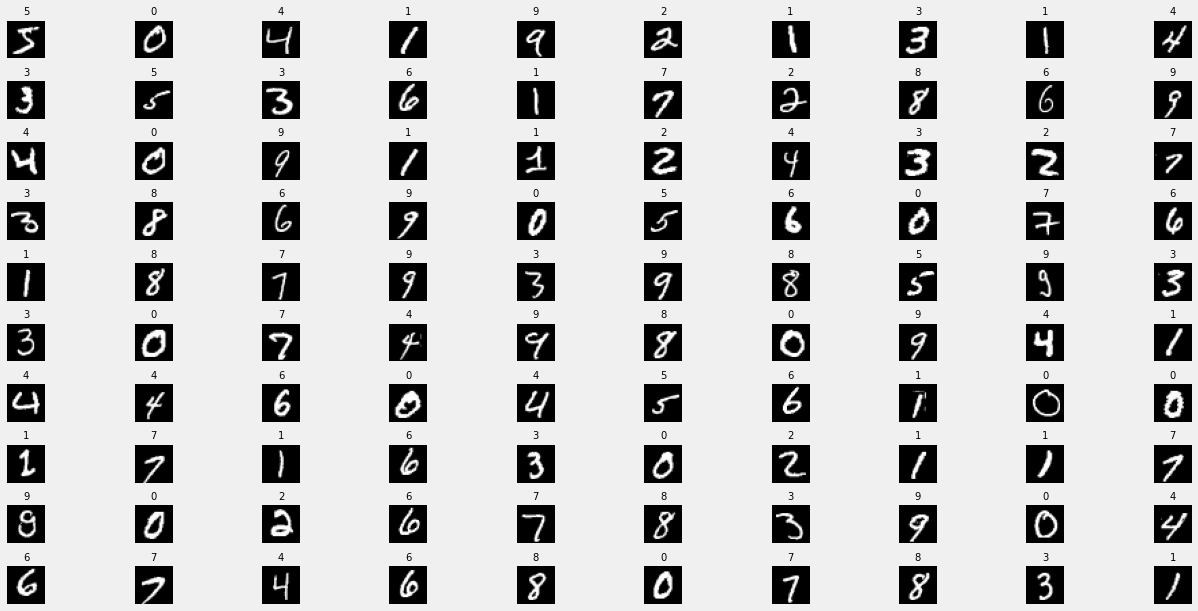

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 0.6)
for q in range(100):
  fig.add_subplot(10,10,q+1)
  plt.imshow(x_train[q],cmap='gray');
  plt.title(y_train[q],fontsize=10)
  plt.axis('off')
  

# Normalize the images. While we know that the pixle intensity of all images ranging from 0 to 255 so for simpicity we normalize the images by diving by 255

In [ ]:
x_train=x_train.reshape(-1,28,28,1)/255;
x_test=x_test.reshape(-1,28,28,1)/255;

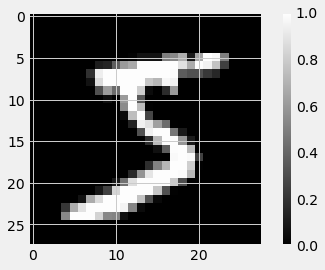

In [ ]:
plt.imshow(x_train[0].reshape(28,28),cmap='gray');
plt.colorbar();

# Convolutional Autoencoders  

In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(32, (2,2), input_shape=(28,28,1), activation='relu',padding='same',kernel_initializer='HeNormal'))
model_2.add(MaxPooling2D((2,2)))
model_2.add(Conv2D(8,(2,2), activation='relu'))
#model_2.add(BatchNormalization())
model_2.add(MaxPooling2D((2,2)))
model_2.add(Conv2D(8,(2,2), activation='relu'))
#model_2.add(BatchNormalization())

model_2.add(UpSampling2D((2,2)))
model_2.add(Conv2D(8,(2,2), activation='relu'))
#model_2.add(BatchNormalization())
model_2.add(UpSampling2D((2,2)))
model_2.add(Conv2D(1,(2,2),activation=None))
model_2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1032      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           264       
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 8)        0

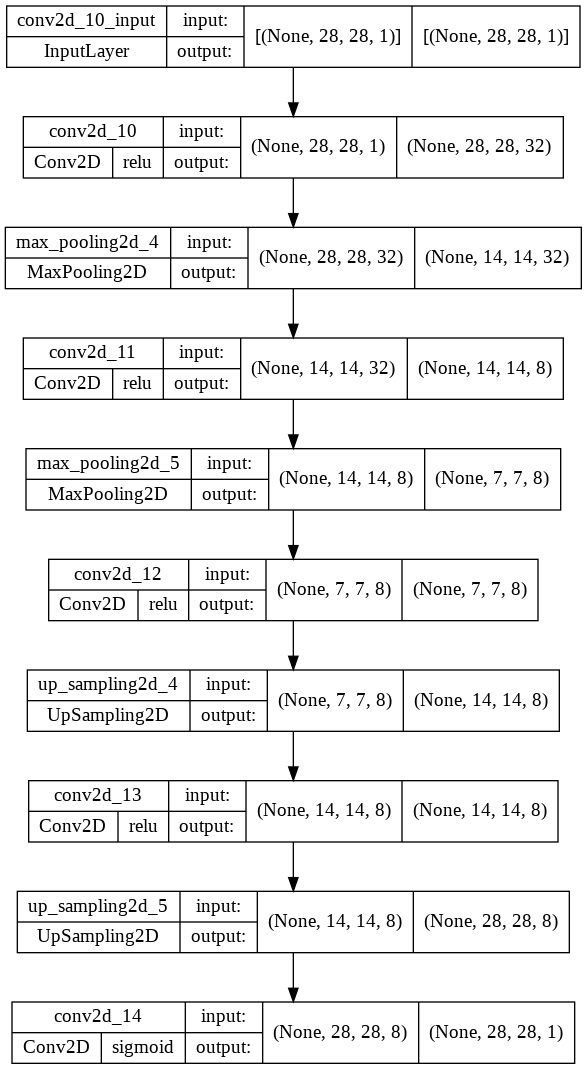

In [ ]:
plot_model(model_2, show_shapes=True, show_layer_activations=True)

In [ ]:
model_2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='mse',metrics=['accuracy'])

# Unlike all other models, here we fit x_train to x_train

In [ ]:
model_2.fit(x_train,x_train,epochs=50,batch_size=500,validation_split=0.2)

Epoch 1/50
96/96 [==============================] - 12s 31ms/step - loss: 0.0497 - accuracy: 0.7988 - val_loss: 0.0341 - val_accuracy: 0.7973
Epoch 2/50
96/96 [==============================] - 3s 28ms/step - loss: 0.0306 - accuracy: 0.8010 - val_loss: 0.0281 - val_accuracy: 0.8036
Epoch 3/50
96/96 [==============================] - 3s 28ms/step - loss: 0.0263 - accuracy: 0.8043 - val_loss: 0.0250 - val_accuracy: 0.8076
Epoch 4/50
96/96 [==============================] - 3s 28ms/step - loss: 0.0236 - accuracy: 0.8062 - val_loss: 0.0226 - val_accuracy: 0.8076
Epoch 5/50
96/96 [==============================] - 3s 28ms/step - loss: 0.0218 - accuracy: 0.8072 - val_loss: 0.0214 - val_accuracy: 0.8094
Epoch 6/50
96/96 [==============================] - 3s 28ms/step - loss: 0.0208 - accuracy: 0.8079 - val_loss: 0.0203 - val_accuracy: 0.8093
Epoch 7/50
96/96 [==============================] - 3s 28ms/step - loss: 0.0200 - accuracy: 0.8085 - val_loss: 0.0196 - val_accuracy: 0.8102
Epoch 8/50
9

In [ ]:
ex1=model_2.predict(x_test[10].reshape(-1,28,28,1))

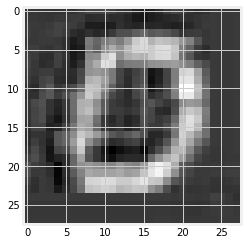

In [ ]:
plt.imshow(ex1.reshape(28,28),cmap='gray');

# Autoencoder for denosing 

In [ ]:
import skimage

In [ ]:
x1= skimage.util.random_noise(x_test[0].reshape(28,28), mode='gaussian',mean=0.0,var=0.3)

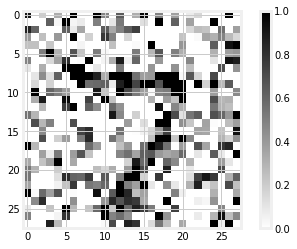

In [ ]:
plt.imshow(x1.reshape(28,28),cmap='gray_r');
plt.colorbar();

# Generate more Gaussian noise with different variations

In [ ]:
x_train_noise,x_test_noise=[],[]
for q in tqdm(range(len(x_train))):
  x_train_noise.append(skimage.util.random_noise(x_train[q], mode='gaussian',mean=0.0,var=0.3))

for q,item in tqdm(enumerate(x_test)):
  x_test_noise.append(skimage.util.random_noise(x_test[q], mode='gaussian',mean=0.0,var=0.3))

x_train_noise_1,x_test_noise_1=[],[]
for q in tqdm(range(len(x_train))):
  x_train_noise_1.append(skimage.util.random_noise(x_train[q], mode='gaussian',mean=0.0,var=0.7))

for q,item in tqdm(enumerate(x_test)):
  x_test_noise_1.append(skimage.util.random_noise(x_test[q], mode='gaussian',mean=0.0,var=0.7))


100%|██████████| 60000/60000 [00:07<00:00, 7589.82it/s]
10000it [00:01, 8663.81it/s]
100%|██████████| 60000/60000 [00:06<00:00, 9293.28it/s] 
10000it [00:01, 9290.79it/s]


# fit the model to the noised images trying to pridect the internal strcture of the ideal images

In [ ]:
model_2.fit(np.array(x_train_noise_1),x_train,epochs=50,batch_size=250,validation_split=0.2)

Epoch 1/50
192/192 [==============================] - 13s 9ms/step - loss: 0.1040 - accuracy: 0.8087 - val_loss: 0.0886 - val_accuracy: 0.8093
Epoch 2/50
192/192 [==============================] - 1s 8ms/step - loss: 0.0882 - accuracy: 0.8087 - val_loss: 0.0862 - val_accuracy: 0.8093
Epoch 3/50
192/192 [==============================] - 1s 8ms/step - loss: 0.0828 - accuracy: 0.8083 - val_loss: 0.0719 - val_accuracy: 0.8051
Epoch 4/50
192/192 [==============================] - 2s 8ms/step - loss: 0.0637 - accuracy: 0.7998 - val_loss: 0.0602 - val_accuracy: 0.7976
Epoch 5/50
192/192 [==============================] - 2s 8ms/step - loss: 0.0589 - accuracy: 0.7983 - val_loss: 0.0583 - val_accuracy: 0.7981
Epoch 6/50
192/192 [==============================] - 2s 8ms/step - loss: 0.0574 - accuracy: 0.7983 - val_loss: 0.0572 - val_accuracy: 0.7976
Epoch 7/50
192/192 [==============================] - 1s 8ms/step - loss: 0.0565 - accuracy: 0.7984 - val_loss: 0.0563 - val_accuracy: 0.7980
Epoch

# Patrial noise with $\sigma=0.3$ 

100%|██████████| 20/20 [00:02<00:00,  8.39it/s]


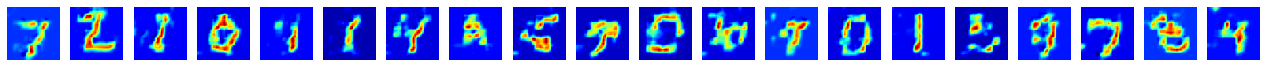

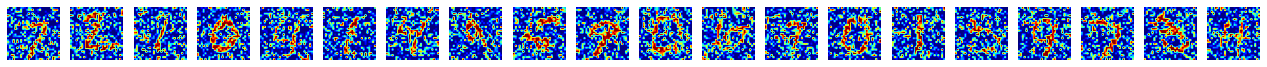

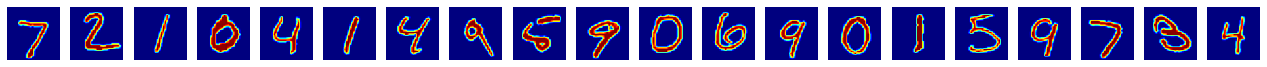

In [ ]:
fig = plt.figure(figsize=(20,10))
for q in tqdm(range(20)):
  y = fig.add_subplot(1,20,q+1)
  y.imshow(model_2.predict(x_test_noise[q].reshape(-1,28,28,1)).reshape(28,28),cmap='jet')
  plt.axis('off')
fig = plt.figure(figsize=(20,10))
for q in range(20):
  y = fig.add_subplot(1,20,q+1)
  y.imshow(x_test_noise[q].reshape(28,28),cmap='jet')
  plt.axis('off')  
fig = plt.figure(figsize=(20,10))
for q in range(20):
  y = fig.add_subplot(1,20,q+1)
  y.imshow(x_test[q].reshape(28,28),cmap='jet')
  plt.axis('off')
    

# Complete noise with $\sigma=0.7$

100%|██████████| 20/20 [00:01<00:00, 14.30it/s]


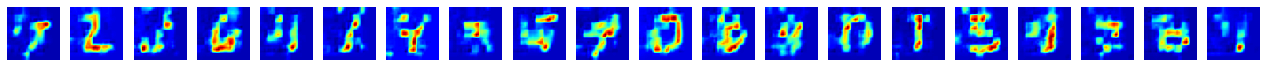

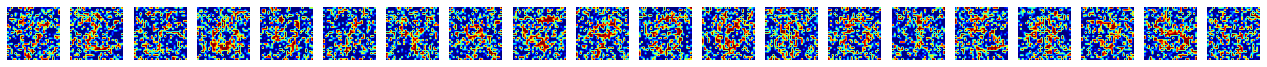

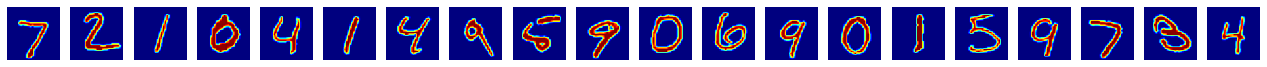

In [ ]:
fig = plt.figure(figsize=(20,10))
for q in tqdm(range(20)):
  y = fig.add_subplot(1,20,q+1)
  y.imshow(model_2.predict(x_test_noise_1[q].reshape(-1,28,28,1)).reshape(28,28),cmap='jet')
  plt.axis('off')
fig = plt.figure(figsize=(20,10))
for q in range(20):
  y = fig.add_subplot(1,20,q+1)8
  y.imshow(x_test_noise_1[q].reshape(28,28),cmap='jet')
  plt.axis('off')  
fig = plt.figure(figsize=(20,10))
for q in range(20):
  y = fig.add_subplot(1,20,q+1)
  y.imshow(x_test[q].reshape(28,28),cmap='jet')
  plt.axis('off')  

# Let us access the latent space

In [ ]:
def encoder():
    encoder1 = layers.Conv2D(32,kernel_size=2,activation='relu',padding='same',name='layer1')(encoder_input)
    encoder2 = layers.MaxPooling2D((2,2),padding='same')(encoder1)
    encoder3 = layers.Conv2D(8,kernel_size=2,activation='relu',padding='same',name='layer2')(encoder2)
    encoder4 = layers.MaxPooling2D((2,2),padding='same')(encoder3)
    encoder5 = layers.Conv2D(8,kernel_size=2,activation='relu',padding='same',name='layer3')(encoder4)
    encoder6 = layers.Flatten()(encoder5)
    encoder_output = layers.Dense(latent,activation=None,name='layer4')(encoder6)
    encoder_model= Model(encoder_input,encoder_output)
    return encoder_model
def decoder():
    decoder_input = keras.Input(shape=(latent,))
    decoder1 = layers.Dense(392,activation=None,name='layer5')(decoder_input)
    decoder2 = layers.Reshape((7,7,8))(decoder1) 
    decoder3 = layers.Conv2D(8,kernel_size=2,padding='same',activation='relu',name='layer6')(decoder2)
    decoder4 = layers.UpSampling2D((2,2))(decoder3)
    decoder5 = layers.Conv2D(32,kernel_size=2,activation='relu',padding='same',name='layer7')(decoder4)
    decoder6 = layers.UpSampling2D((2,2))(decoder5)
    decoder_output = layers.Conv2D(1,kernel_size=2,activation='relu',padding='same',name='layer8')(decoder6)
    decoder_model= Model(decoder_input,decoder_output)
    return decoder_model


latent=64 # dimension of the latent space
encoder_input = keras.Input(shape=(28,28,1))
autoencoder=Model(encoder_input,decoder()(encoder()(encoder_input)))


In [ ]:
autoencoder.compile(optimizer=Adam(),loss='mse',metrics=['accuracy'])
encoder().summary(),decoder().summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 layer1 (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 layer2 (Conv2D)             (None, 14, 14, 8)         1032      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 layer3 (Conv2D)             (None, 7, 7, 8)           264

(None, None)

In [ ]:
autoencoder.fit(x_train,x_train,epochs=50,batch_size=100,validation_split=0.2)


Epoch 1/50
480/480 [==============================] - 5s 8ms/step - loss: 0.0253 - accuracy: 0.8088 - val_loss: 0.0130 - val_accuracy: 0.8135
Epoch 2/50
480/480 [==============================] - 3s 7ms/step - loss: 0.0111 - accuracy: 0.8133 - val_loss: 0.0098 - val_accuracy: 0.8146
Epoch 3/50
480/480 [==============================] - 3s 7ms/step - loss: 0.0089 - accuracy: 0.8139 - val_loss: 0.0085 - val_accuracy: 0.8146
Epoch 4/50
480/480 [==============================] - 3s 7ms/step - loss: 0.0078 - accuracy: 0.8142 - val_loss: 0.0075 - val_accuracy: 0.8150
Epoch 5/50
480/480 [==============================] - 4s 7ms/step - loss: 0.0071 - accuracy: 0.8144 - val_loss: 0.0070 - val_accuracy: 0.8152
Epoch 6/50
480/480 [==============================] - 3s 7ms/step - loss: 0.0066 - accuracy: 0.8145 - val_loss: 0.0065 - val_accuracy: 0.8154
Epoch 7/50
480/480 [==============================] - 3s 7ms/step - loss: 0.0062 - accuracy: 0.8146 - val_loss: 0.0062 - val_accuracy: 0.8155
Epoch 

In [ ]:
y_pred=autoencoder.predict(x_test[0].reshape(-1,28,28,1))

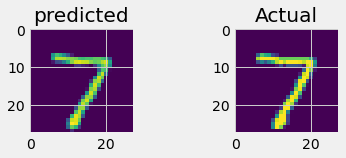

In [ ]:
fig = plt.figure()
fig.add_subplot(221)
plt.imshow(y_pred.reshape(28,28));
plt.title('predicted');
fig.add_subplot(222);
plt.imshow(x_test[0,:,:,0]);
plt.title('Actual');

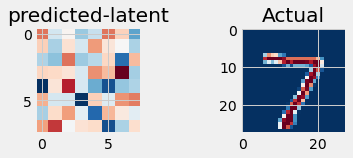

In [ ]:
fig = plt.figure()
fig.add_subplot(221)
plt.imshow(encoder().predict(x_test[0].reshape(-1,28,28,1)).reshape(8,8),cmap='RdBu_r');
plt.title('predicted-latent');
fig.add_subplot(222);
plt.imshow(x_test[0,:,:,0],cmap='RdBu_r');
plt.title('Actual');

# pixles correlation in the latent space

In [ ]:
x=[]
for q in tqdm(range(5000)):
    x.append(encoder().predict(x_test[q].reshape(-1,28,28,1)));
    

100%|██████████| 5000/5000 [13:57<00:00,  5.97it/s]


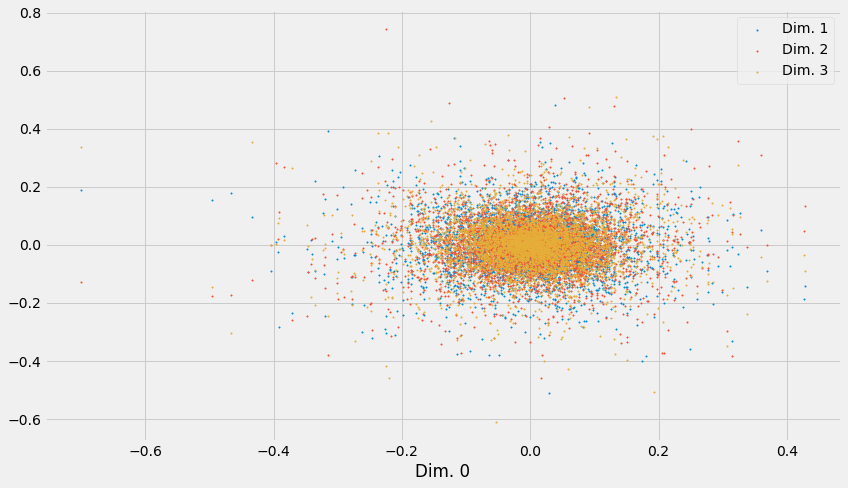

In [ ]:
fig=plt.figure(figsize=(12,7))
plt.scatter(np.array(x)[:,0,0],np.array(x)[:,0,1],s=2,label='Dim. 1');
plt.scatter(np.array(x)[:,0,0],np.array(x)[:,0,2],s=2,label='Dim. 2');
plt.scatter(np.array(x)[:,0,0],np.array(x)[:,0,3],s=2,label='Dim. 3');

plt.xlabel('Dim. 0')
plt.legend();
plt.tight_layout();

